### Import useful libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### In this section, we will use the NHL_Team_Stats dataset we compiled and cleaned up in the assignment for Week 2. 
Import both NHL_Team_Stats and NHL_Team_R_Stats data from Week 2 assignment into Python.

In [3]:
NHL_Team_Stats=pd.read_csv("../../Data/Week 4/NHL_Team_Stats.csv")
NHL_Team_R_Stats=pd.read_csv("../../Data/Week 4/NHL_Team_R_Stats.csv")
NHL_Team_Stats.head()

,tricode,pp,pk,ppgf,competition_name,tid,type,win,goals_for,goals_against,game_count,team_name,win_pct,avg_gf,avg_ga
0,ANA,35,27,9.0,2010 NHL Playoff,21,3,2,19.0,22.0,6,Anaheim Ducks,0.333333,3.166667,3.666667
1,BOS,126,116,22.0,2010 NHL Playoff,20,3,16,76.0,48.0,24,Boston Bruins,0.666667,3.166667,2.000000
2,BUF,48,46,13.0,2010 NHL Playoff,17,3,3,17.0,22.0,7,Buffalo Sabres,0.428571,2.428571,3.142857
3,CHI,27,39,6.0,2010 NHL Playoff,6,3,3,22.0,16.0,7,Chicago Blackhawks,0.428571,3.142857,2.285714
4,DET,59,55,6.0,2010 NHL Playoff,18,3,7,36.0,27.0,11,Detroit Red Wings,0.636364,3.272727,2.454545


## Regression analyses in Python
#### To run regressions in Python, we will introduce a new library, “statsmodels,” which is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [4]:
import statsmodels.formula.api as sm

At the end of the assignment in week 2, we observed that there is a linear relationship between total goals for and winning percentage. Let’s run a regression where winning percentage is the dependent variable and total goals for is the explanatory variable. 
- We can use the command “ols()” to indicate an ordinary least squared regression. 
- The “fit()” function would allow us to obtain the estimated coefficient of our regression model.

In [5]:
reg1 = sm.ols(formula = 'win_pct ~ goals_for', data= NHL_Team_R_Stats).fit()

After we run a regression, we can use the “summary()” command to obtain a number of statistics from our regression model.


In [6]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     258.2
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.52e-36
Time:                        12:13:42   Log-Likelihood:                 253.82
No. Observations:                 181   AIC:                            -503.6
Df Residuals:                     179   BIC:                            -497.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1781      0.042     -4.222      0.0

### Interpreting results
From the result table, we can see that the dependent variable is winning percentage ("win_pct") and there are 181 observations in this regression. The independent variable is the number of goals for the team ("goals_for"). An intercept is also included in the regression. 

The estimated coefficient on goals_for is 0.003. This means that an additional goal scored by the team will increase the team's winning percentage of 0.003. The estimate on the intercept is -0.1781. This means that without scoring any goal, the winning percentage for the team would be -0.1781. As we know, the winning percentage cannot be negative. The reason we get a negative estimate on the intercept is because in our sample, there is not a single game where a team scored zero goals.

- t-statistics and p-value

t-statistics is defined as the estimated coefficient divided by its standard error. If the estimated coefficient is large compared to its standard error, then it is likely to be different than zero. 

p-value is defined as the probability of obtaining a result as extreme as the result actually observed, in this case, the t-statistics we have in the regression analysis. Comparing the t-statistics with the student t distribution, if 95% of the t distribution is closer to the mean than the t-statistics, we will have p-value of 0.05, which is also referred to a 5% significance level. A p-value no more than 0.05 (5%) is generally accepted in rejecting the null hypothesis. We say that the estimated coefficient is statistically significant at the 5% level.

In this regression, the p-value of the goals_for variable is 0.000 which suggests that the estimate is statistically significant at the 1% level.


- R-squared


R-squared measures the goodness of fit of the model. The R-squared of a regression is the fraction of the variation in the dependent variable that is accounted for by the independent variables. R-squared is always between 0 and 1. The larger the R-squared, the more variation is accounted for by the regression model.

In this regression, the R-squared is 0.591 which means that approximately 59.1% of the variation of the winning percentage is accounted for by the model.

#### Let's explore the relationship between goals_against and winning percentage in the regular season.
- Create a scatter plot to depict the relationship between total goals against and winning percentage without seperating the data by competition

Text(0.5, 1.0, 'Relationship between Goals against and Winning Percentage')

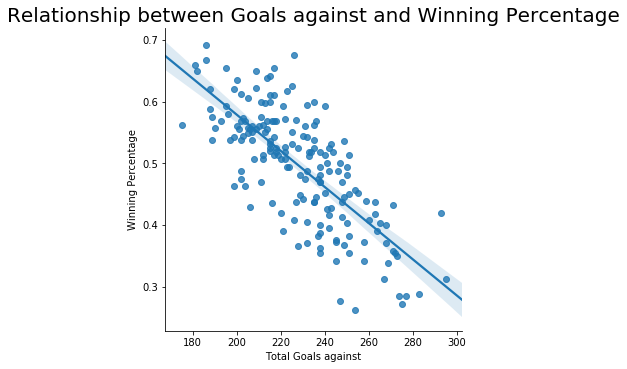

In [7]:
import seaborn as sns
sns.lmplot(x='goals_against', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Total Goals against')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals against and Winning Percentage", fontsize=20)

- Calculate the correlation coefficient between goals against and winning percentage


In [8]:
NHL_Team_R_Stats['goals_against'].corr(NHL_Team_R_Stats['win_pct'])

-0.7445117715217243

- Run a simple linear regression to find NHL team winning percentage as a function of total goals against


In [9]:
reg2 = sm.ols(formula = 'win_pct ~ goals_against', data= NHL_Team_R_Stats).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.09e-33
Time:                        12:13:44   Log-Likelihood:                 246.15
No. Observations:                 181   AIC:                            -488.3
Df Residuals:                     179   BIC:                            -481.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1651      0.045     25.839

## Self Test - 1
1. Use the regular season data, create a scatterplot and a regression line to demonstrate the relationship between average goals for per game and winning percentage.
2. Run a linear regression where winning percentage is the dependent variable and average goals for is the explanatory variable
3. Interpret the coefficient on the average goals for, is this estimate statistically significant?
4. How well does this regression do in fitting the data?

Text(0.5, 1.0, 'Relationship between average goals for and Winning Percentage')

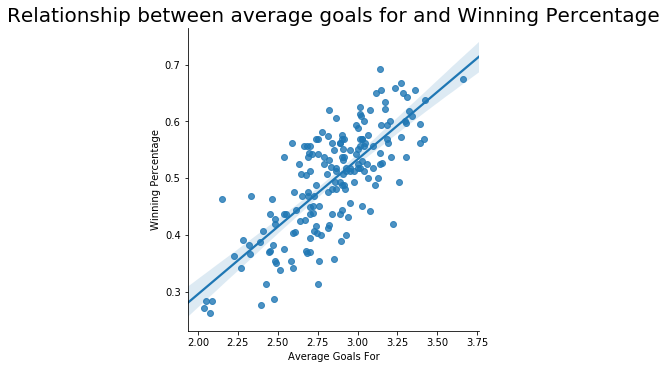

In [10]:
#Your Code Here
sns.lmplot(x='avg_gf', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Average Goals For')
plt.ylabel('Winning Percentage')
plt.title("Relationship between average goals for and Winning Percentage", fontsize=20)

In [11]:
reg3 = sm.ols(formula = 'win_pct ~ avg_gf', data= NHL_Team_R_Stats).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           6.66e-35
Time:                        12:13:45   Log-Likelihood:                 250.01
No. Observations:                 181   AIC:                            -496.0
Df Residuals:                     179   BIC:                            -489.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1804      0.044     -4.111      0.0

### Multiple Regression -  more than one explanatory variables.
Often times, the outcome variable of interest is affected by multiple factors. We can specify a regression equation where the outcome is function of more than one explanatory variables.

Let's run a linear regression where winning percentage is a function of both average number of goals for per game and average number of goals against per game.

In [12]:
reg4 = sm.ols(formula = 'win_pct ~ avg_gf+avg_ga', data= NHL_Team_R_Stats).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     985.1
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           5.39e-97
Time:                        12:13:45   Log-Likelihood:                 398.42
No. Observations:                 181   AIC:                            -790.8
Df Residuals:                     178   BIC:                            -781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4862      0.031     15.559      0.0

_Interpret the coefficients_

- Average goals for: for the same average number of goals against, scoring one more goal per game will increase the winning percentage by 0.1909 (19.09%)
- Average goals against: having the same average number of goals for per game, conceding one more goal per game will decrease the winning percentage by 0.1874 (18.74%)

### Regression with categorical variables
In the above regressions, we focus on using quantitative variables as explanatory variables. We could also include categorical variables as explanatory variables in the regression as well.

Essentially, when we incorporate a categorical variable, we first transform it into dummy variable(s) that carry value of either 0 or 1. We then use the dummy variable(s) into our regression.

Let's consider the dataset that includes both regular season and playoff. In this dataset, the variable "type" captures whether a game is a regular season game or playoff game. type=2 means it is regular season competition while type=3 means it is a playoff game.

_We will first convert variable "type" into categorical variable._

In [13]:
NHL_Team_Stats['type']=NHL_Team_Stats['type'].astype(object)

Now we can run a regression where winning percentage is a function of average goals for and the type of competition. 

In [14]:
reg5 = sm.ols(formula = 'win_pct ~ avg_gf+type', data= NHL_Team_Stats).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           6.88e-45
Time:                        12:13:45   Log-Likelihood:                 320.28
No. Observations:                 369   AIC:                            -634.6
Df Residuals:                     366   BIC:                            -622.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0197      0.035     -0.558      0.5

A dummy variable = 1 if type= 3 (playoff) and = 0 if type = 2 (regular season) is included in the regression.

_Interpretation: with the same average goals for per game, the winning percentage in the playoff games is 0.0160 (1.6%) lower than the winning percentage in the regular season games._


## Self Test - 2
1. Run a regression where winning percentage is a function of average goals for, average goals against, and control for the different competitions.

2. Interpret the coefficients.

In [15]:
#Your Code Here
reg6 = sm.ols(formula = 'win_pct ~ avg_gf+avg_ga+type', data= NHL_Team_Stats).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           6.88e-45
Time:                        12:13:50   Log-Likelihood:                 320.28
No. Observations:                 369   AIC:                            -634.6
Df Residuals:                     366   BIC:                            -622.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0197      0.035     -0.558      0.5

### Regression with an interaction term

What if the impact of an independent variable depends on the value of another variable? We can use interaction terms to allow for different impact of a variable based on one or more levels of another categorical variable.

Let's consider the possibility that the average goals for may have different impact on winning percentage depending on the type of the game. We can run a regression of winning percentage on the average goals for, the type of the game, as well as the interaction between average goals for and type.

In [14]:
reg7 = sm.ols(formula = 'win_pct ~ avg_gf+type+avg_gf*type', data= NHL_Team_Stats).fit()
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     96.00
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           8.01e-46
Time:                        12:52:50   Log-Likelihood:                 325.08
No. Observations:                 369   AIC:                            -642.2
Df Residuals:                     365   BIC:                            -626.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1748      0.061  

_Interpretations_

- For regular season games (type =2), scoring one more goal per game can increase the winning percentage by 0.2365 (23.65%);
- For the playoff games (type =3), scoring one more goal per game will increase the winning percentage by 0.2365-0.0802=0.1563 (15.63%).


## Self Test - 3
#### Perform a similar exercise to find the relationship between the actual winning percentage and pythagorean winning percentage
1. In the NHL_Team_Stats data, create the pythagorean winning percentage=goals_for^2/(goals_for^2+goals_against^2), call this new variable "pyth_pct"
(In Python, ** is the operator for exponentiation. For example, the square of x would be x**2 in Python.)

In [17]:
#Your Code Here
NHL_Team_Stats['pyth'] = NHL_Team_Stats['goals_for']**2 / (NHL_Team_Stats['goals_for']**2 + NHL_Team_Stats['goals_against']**2)

2. Create a scatter plot to show the relationship between Pythagorean winning percentage and the actual winning percentage


Text(0.5, 1.0, 'Relationship between pythagorean and Winning Percentage')

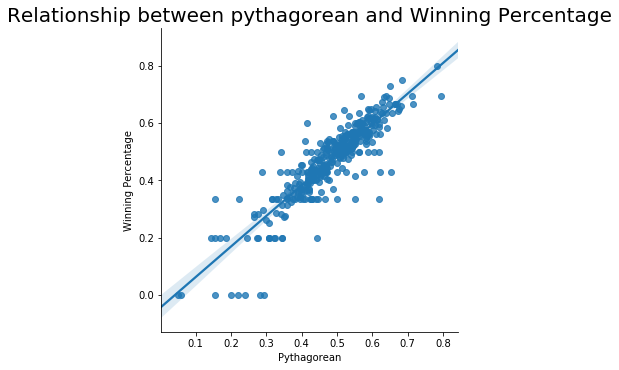

In [19]:
#Your Code Here
#Your Code Here
sns.lmplot(x='pyth', y='win_pct',  data=NHL_Team_Stats)
plt.xlabel('Pythagorean')
plt.ylabel('Winning Percentage')
plt.title("Relationship between pythagorean and Winning Percentage", fontsize=20)

3. Run a linear regression (reg8) where winning percentage is the dependent variable and Pythagorean winning percentage is the explanatory variable.
4. Interpret the estimate on the Pythagorean winning percentage and the goodness of fit of the regression model.


In [20]:
#Your Code Here
reg8 = sm.ols(formula = 'win_pct ~ pyth', data= NHL_Team_Stats).fit()
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1297.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          1.65e-122
Time:                        12:35:25   Log-Likelihood:                 496.63
No. Observations:                 369   AIC:                            -989.3
Df Residuals:                     367   BIC:                            -981.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0447      0.015     -3.052      0.0

5. Create a scatter plot to show the relationship between winning percentage and Pythagorean winning percentage, seperate the data points by the type of competition.


Text(0.5, 1.0, 'Relationship between the pythagorean and winning percentage')

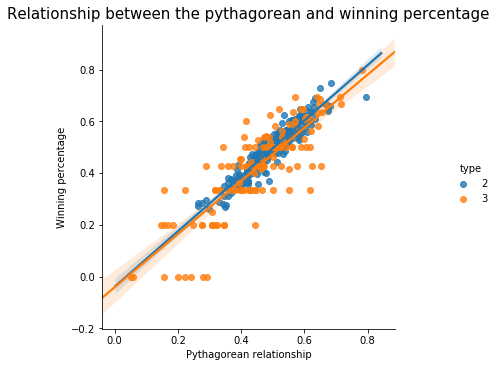

In [23]:
#Your Code Here
sns.lmplot(x='pyth', y='win_pct', hue='type', data=NHL_Team_Stats)
plt.xlabel('Pythagorean relationship')
plt.ylabel('Winning percentage')
plt.title("Relationship between the pythagorean and winning percentage", fontsize=15)

6. Run a regression (reg9) where winning percentage is the dependent variable and Pythagorean winning percentage is the explanatory variable, controlling for the different competitions.
7. Interpret the estimate on the Pythagorean winning percentage and the goodness of fit of the regression model.

In [24]:
#Your Code Here
reg9 = sm.ols(formula = 'win_pct ~ pyth + type', data= NHL_Team_Stats).fit()
print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     670.8
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          3.93e-123
Time:                        12:44:57   Log-Likelihood:                 501.92
No. Observations:                 369   AIC:                            -997.8
Df Residuals:                     366   BIC:                            -986.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0260      0.016     -1.671      0.0

8. Run a regression (reg10) where winning percentage is the dependent variable and Pythagorean winning percentage, competition, and the interaction between competition and Pythagorean are the explanatory variables
9. Interpret the estimate on the Pythagorean winning percentage and the goodness of fit of the regression model

In [25]:
#Your Code Here
reg10 = sm.ols(formula = 'win_pct ~ pyth + type + pyth*type', data= NHL_Team_Stats).fit()
print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     446.7
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          8.98e-122
Time:                        12:45:26   Log-Likelihood:                 502.17
No. Observations:                 369   AIC:                            -996.3
Df Residuals:                     365   BIC:                            -980.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0389      0.024     -1.

10. Discussion question: how well does Pythagorean winning percentage predicts the actual winning percentage based on our data?